### Group members (first and last names):
- ####  *Abdelhak Kermia*


# Introduction

Welcome to the first lab. Take a moment to familiarize yourself with this interactive notebook. Each notebook is composed of cells. Each cell can be [markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) _(easy-to-format text)_ or **code** (Python 3). Markdown cells also accept $\LaTeX$ formatting. Feel free to double-click on these textual cells (switching to edit mode) to see how they were made.

When a cell is highlighted, it has two modes: command and input. Press `Esc` to go to *command mode*, press `Enter` to go into *edit/input mode*. There are a few shortcuts that only work in edit mode that can make your life easier.

**Some useful shortcuts**:
- `Shift + Enter` to evaluate the current cell
- in *command mode*, press `a` to create a new cell above the current, `b` to create one below
- `Ctrl + m + m` to convert to markdown
- `Ctrl + m + y` to convert to code.

❗These shortcuts vary between programs. To check the keyboard shortcuts in Google Colab `Ctrl + m + h`

### (Computational) kernel

Jupyter as a server generates the interactive web interface that you are seeing (and using) now. To run the code, the server maintains a running instance of Python, what is called a _computational kernel_. Think of it as an open terminal window with the interactive Python open: each time you _evaluate_ a cell, the code is run on that "kernel", and the output is displayed below the input cell. Try to run the cell below:

In [1]:
a = 3+2
print(a)

5


Then you can use the variable `a` again in your next executions:

In [2]:
print(a)

5


Just remember that the order in which you run the cells matters: for example try running next the cell below this text, and then the cell above this text once more.

In [3]:
a = 3-2
print(a)

1


Check the `Runtime` menu on top of the page for options on controlling the underlying Python execution. For example, `Restart Session & Run All` terminates the current kernel, launches a new fresh one, then executes all (code) cells in the notebook in order. The `Interrupt Execution` command is also useful if a bug gets the execution stuck.

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pts]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are worth 0 points: partial points can be awarded at the teacher's discretion. Overcomplete answers do not award extra points.

Don't forget to **save your work frequently!** (`Ctrl + s`)

**You need at least 17 points (out of 26 available) to pass** (66%).

# 1. Fundamentals

#### 1.1 **[1pt]** Write the equation of a linear model. You should use $\LaTeX$ formatting, just wrap the equation in between dollar signs (e.g. `$\LaTeX$`).

$y=mx+q$

#### 1.2 **[1pt]** Describe with your own words (i.e. English) what is a *Training Dataset*.
There is not an explicit definition in the slides, you should understand the math (your lecture notes may help).

In supervised ML:<br>
 - A dataset is made of datapoints which are pairs of input and output values (prediction and true value/ feature and target,labels).
 - A training dataset is a portion of the whole dataset which is used to fit (training phase) a model for prediction,classification or other applications(learns patterns and relationships).
  - It is followed by the validation/test set (for performance evaluation of the model)

#### 1.3 **[1pt]** Which word describes when the trained model is too complex to capture the underlying simplicity of the data?
Careful not to pick the wrong term.

Overfitting

# 2. Error and loss

Understanding the concept of loss is fundamental to comprehending the general idea of an "error". ML is founded on the basis of recognizing error and minimizing it.

#### 2.1 **[3pt]** About the *Loss Function*: why $L(\hat y, y) = 0 \;\;\text{if}\;\; \hat y = y, \;\;\forall y \in Y$?

Remember that the *Loss* is a simple difference between prediction and target.

If the estimated/predicted value $\hat y$ is equal to the real value/target y for all y in the dataset then the difference/loss function is null/0:<br>
- It means that there is no errors/loss between prediction and reality/target values from the dataset: it is a perfect prediction. No loss = no discrepancy between prediction and target.<br>
- In short, the model input values predicts/fits exactly the output values of the dataset for every datapoints of the dataset.

# 3. Simplest learning

Enough concepts, let's have some fun. I hope you are familiar with Python -- if not yet, you should become so by the end of the course. If your confidence is low you should start a discussion on Moodle, so that you can all help each other (and help us help you).

Do you know about `lambda` functions in Python? You can write a method that returns a function. The function can be used as if it was a method defined with `def`. Remember:
1. `lambda`s always (implicitly) `return` the result of their computation
2. you cannot write multiline lambdas (go ask Guido van Rossum why).

Still, using them is easier than it sounds:

In [4]:
def add_n(n): return lambda x: n+x
add_3 = add_n(3)
add_3(5)

8

Ok how about we generate and plot some artificial data? Study the code below, if there's anything you are not yet familiar with you should make sure to learn it (ask on Moodle).

I mean it. Later on you will be required to use all of these functionalities yourself. Verify early in the course what you need to refresh and what is entirely new, because later on studying software engineering while working on the (much!) harder assignments may become a problem.

In [5]:
# These lines are required for our plotting function below
# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# While this is the library for numerical manipulations
import numpy as np

# set randomness
np.random.seed(0)

# This is just some styling for the plotting library
sns.set_theme(rc={'figure.figsize':(8,6)}, style="whitegrid")

# Let's create the data from a function you should be acquainted with by now
# (do you know lambdas yet? They are basically short, unnamed methods)
trg_fn = lambda x: 2*x - 1
# Of course, we want the data to be a bit noisy
some_noise = lambda: np.random.normal(0,3)
# Let's generate it using numpy's linear space and a python list comprehension,
# just to make sure you know these too
data = [[x, trg_fn(x) + some_noise()] for x in np.linspace(-10, 10, 50)]

# You will find commonly data treated by axis/column rather than coordinate pairs.
# This aggregates data series belonging to the same dimension (feature)
transpose = lambda lst: list(map(list, zip(*lst)))
data_x, data_y = transpose(data)

# And here's a canned plotting function that you are free to use (for now...)
def plot_data_and_model(model=None, text=None):
    ret = sns.scatterplot(x=data_x, y=data_y) # hard-coded data plotting because we can
    if model is not None:
        sns.lineplot(x=data_x, y=[model(x) for x in data_x], color='darkred')
    if text is not None:
        plt.title(text)
    return ret

Here is what the data you just generated looks like:

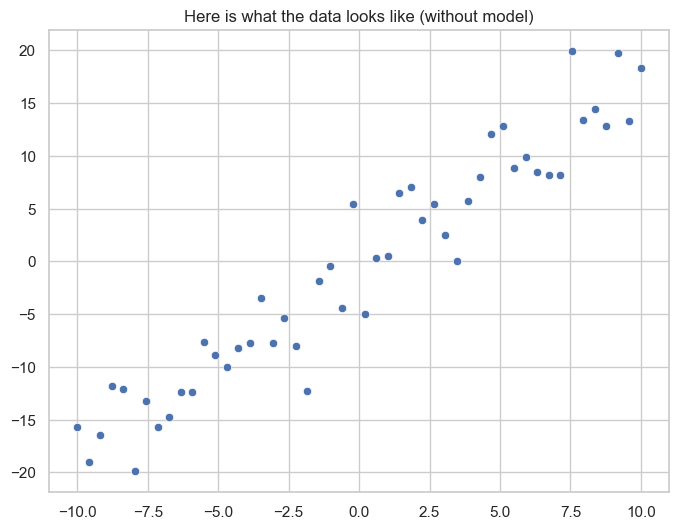

In [6]:
plot_data_and_model(text="Here is what the data looks like (without model)");

And here is what it looks like if you cheat and plot the underlying function (ideally your final, learned model should look similar)

<Axes: title={'center': 'Data with generating function'}>

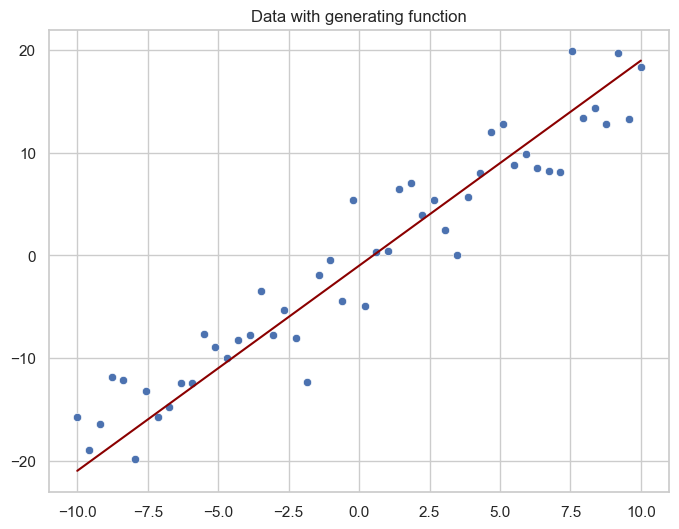

In [7]:
plot_data_and_model(trg_fn, text="Data with generating function")

#### 3.1 **[2pt]** Write your linear model as a method that takes `m` and `q` as input, and return a linear function of the form `mx + q`.

❗Define the function using `lambda`

In [8]:
# Nested lambda version
line_model = lambda m,q : lambda x: m*x+q

#The "intermediate" version : lambda in a standard function
def line_inter(m,q): return lambda x: m * x + q

#The equivalent standard function :
def line_normal_model(m,q):
    def model(x):
        return  m*x+q
    return model
# Comparison
f1 = line_model(3,5); f2 = line_normal_model(3,5); f3 = line_inter(3, 5) # y = 3x+5
print ("line_lambda(4):", f1(4), "\nline_normal(4):", f2(4), "\nline_intermediate(4):", f3(4))  #x=4 -> y=3*4+5 = 17

line_lambda(4): 17 
line_normal(4): 17 
line_intermediate(4): 17


#### 3.2 **[2pt]** Write your loss as a method that takes an `x` and a target and returns the absolute value of their difference

🧠 What happens if we forget the absolute value?

In [9]:
#Lambda version
loss = lambda x, target: abs(target-model(x))

#The equivalent standard function:
def loss_normal (x, target):
    return abs(target-model(x))

# Comparison
model = line_model(3,5) #x=6 -> 3*6+5-> target=23
print ("loss_lambda:", loss(6,20), "\nloss_normal:", loss_normal(6,20)) #abs(23-20) = 3

loss_lambda: 3 
loss_normal: 3


Here is an example of a loop that generates random numbers and maintains a *minimum*.

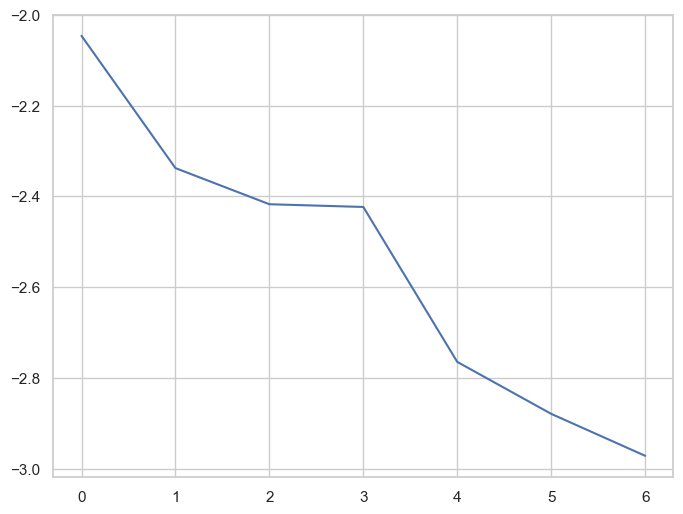

In [10]:
min_guess = np.inf # higher than the highest possible

errors_reduction_list = []
for _ in range(100):
    guess = np.random.uniform(-3,3)
    if guess < min_guess:
        min_guess = guess
        errors_reduction_list.append(min_guess)

sns.lineplot(x=range(len(errors_reduction_list)), y=errors_reduction_list);

💁 It is always useful to visualize how the loss decreases over time, especially for debugging purposes. You can do the same next for your errors/losses.

#### 3.3 **[6pt]** Randomly guess a model's parameters 1000 times. Then plot it using the call below.
```python
plot_data_and_model(lin_model(m, q), text=f"m={round(m,2)}    q={round(q,2)}")        
```
Make sure you understand how string interpolation works when using the format `f"hello w{2+1-3}rld"`.  
You will need to modify the loop above in order to maintain the best guess for your model evaluated by reducing the error.

🧠 Think about how you could compute the total error of a model using the loss function.

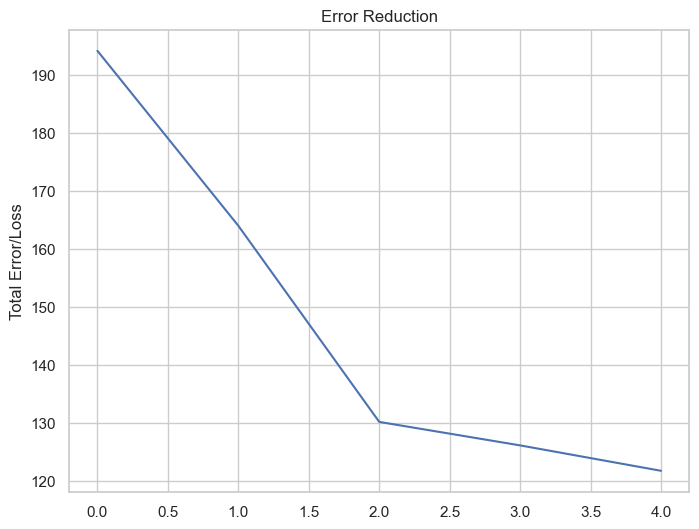

<Axes: title={'center': 'm=1.77    q=-0.93'}>

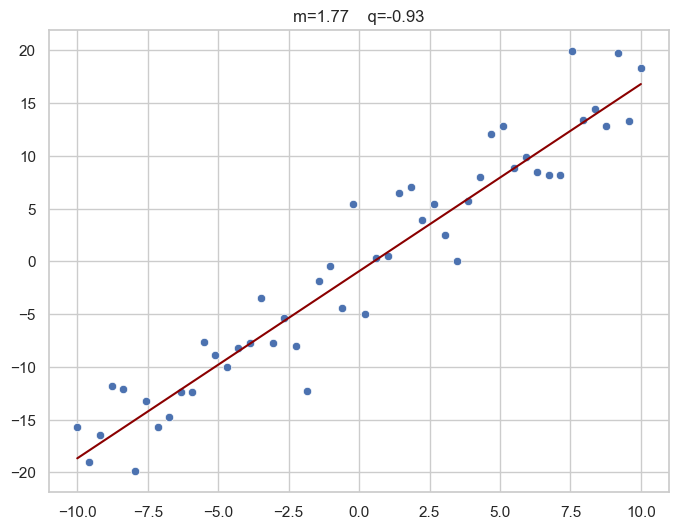

In [11]:
best_guess = None
best_error = np.inf # higher than the highest possible

errors_reduction_list = []
for _ in range(1000):
    guess = np.random.uniform(-3,3,2) # Generates random numbers between a and b [a,b,size]: initial guessed value for m and q
    model = line_model(*guess) # or guess[0],guess[1]
    error_tot = sum([loss(x,target) for x, target in data]) # sum of the differences to the true values from data for each iteration // risk

    if error_tot < best_error:
        best_error = error_tot # lower the threshold
        best_guess = guess # keep the best guess
        errors_reduction_list.append(best_error)

# best fitting parameters for the model (linear)
m,q = best_guess

#plotting
sns.lineplot(x=range(len(errors_reduction_list)), y=errors_reduction_list)
plt.ylabel("Total Error/Loss")
plt.title("Error Reduction")
plt.show()

plot_data_and_model(line_model(m, q), text=f"m={round(m,2)}    q={round(q,2)}")

🧠 How do these parameters compare to the initial function we generated the data from? Take a look above at the `trg_fn` they should be pretty similar. If you're interested, take a moment to plot the progression of errors.

#### 3.4 **[1pt]** Can Logistic Regression be used to predict continuous numerical values like Linear Regression? Why or why not?

No, but it is suitable for binary/multiclass classification (categories) not prediction of continuous numerical values. <br>
 - Logistic function (sigmoid) are bounded by definition to a certain domain of output it cannot fit continuous values.
- Logistic regression output a probability value from 0-1 it is bounded / Linear regression can output a continuous range of value.
- The loss function (log loss) is also not suited for continuous value.

# 4. Fundamentals of Classification and Features

Here is an example dataset of snakes. It has three fields: `head size`, `length` (in cm) and whether it is `poisonous` or not. It looks like this:

```python
snakes = [['small', 38, False],
          ['small', 62, True],
          ['medium', 55, True]]
```

This simple **list of lists** puts the emphasis on the data points (the rows), which is an intuitive approach at first for humans to manually write down the data. You will often encounter tables, JSON and CSV files that look like this. We will explore more machine-friendly formats later (spoilers: column-oriented), so understand this approach is just a step for ease of comprehension.

Let's lighten the mood by focusing on cats and dogs instead for your exercise.

#### 4.1 **[1pt]** Name three features that are highly discriminative to classify cats from dogs, and three which are not.

More specific (more discriminant) :
- Size, Weight, Vocalization type (bark, meow,...), Social behavior (more independant, more social), ...

Less specific (less discriminant) :
- Number of eyes, Number of members(legs), Colors of eyes.

#### 4.2 **[1pt]** Is "number of legs" a numeric feature? Is it discrete or continuous? Is it ordinal? What about "length of tail"?

❗Careful not to confuse "discrete cardinal" with "continuous". If you cannot tell the difference, refresh the concepts 😀

Number of legs is a discrete cardinal feature (can only take a definite numbers of positive,bounded, generally even, integer values)

Ordinal:
- you cannot rank the number of legs except if you make categories with them:
> - like 4,6,10,... legs animals or legless(0)
> - few legs(1-3: more like 2 realistically), four legs, many legs (more than 4)

It is then possible to do an ordering between these categories.

Length of tail is a cardinal continuous feature (positive, bounded)
- you could also put them in ordinal categories by defining intervals of length like short, medium, long tails
> - e.g. short is smaller than medium which is smaller than long.

#### 4.3 **[1pt]** Write a dataset (a list of lists) named `pets` containing cats and dogs, with at least 3 features and 5 entries. Write the corresponding labels in a variable named `labels`. Save the feature names in a variable named `feature_names`.

❗Make sure to include some small dog and large cat, such that their size is not highly discriminant.

In [12]:
feature_names = ['size_cm', 'weight_kg', 'tail_length_cm']

pets = [
    [30, 6, 25],  # Cat 1: Small size, light weight, medium tail
    [25, 3, 20],  # Cat 2: Very small, very light, small tail
    [55, 11, 30], # Cat 3: Medium size, light weight, medium tail (Big Cat example)
    [70, 35, 30], # Dog 1: Medium size, medium weight, medium tail
    [60, 24, 28], # Dog 2: Medium size, medium weight, medium tail
    [40, 12, 20], # Dog 3: Small size, light weight, short tail (Small Dog Example)
    [85, 45, 32]  # Dog 4: Large size, heavy weight, medium tail
]

labels = ['Cat','Cat','Cat','Dog','Dog','Dog','Dog']

Human input means human errors: let's validate the length of these lists using `assert`, which is a Python keyword that will raise an error if its parameter is false (and just do nothing otherwise).  
Here we use `map` to execute `len` over each element of a list (which here is: for each data row), then check if all values correspond to the length of feature names. The function `all` returns whether all of its arguments have truth value. We can also verify the number of labels against the number of data points.

In [13]:
# DO NOT EDIT THIS CELL :)
assert all(l == len(feature_names) for l in map(len, pets))
assert len(pets) == len(labels)

# 5. Decision trees

You are going to write a decision tree by hand, that classifies cats from dogs on your dataset, by using a simple chain of `if/else` statements. Do not overlook this task: it is an industry standard to integrate human expert knowledge in an automated ML system.  

Include at least two questions, meaning the tree depth (max number of decision nodes between start and leaf) should be at least 2. The leaves should contain decision labels, i.e. either $cat$ or $dog$, though you can have multiple instances of either.  
I hope you find it obvious that the labels should not be passed to the function.

Do you know the [splat operator](https://codeyarns.github.io/tech/2012-04-25-unpack-operator-in-python.html)? You may find it useful to pass data points to your function. Here is a short demonstration [video](https://www.youtube.com/watch?v=9LrtOJTnwJE).

With `map`, `zip` and the splat you should now be able to understand the `transpose()` function:

```python
transpose = lambda lst: list(map(list, zip(*lst)))
```

A decent Python skill level is nowadays a mandatory requirement for good Data Analysis or Machine Learning job positions.

#### 5.1 **[2pt]** Implement a Decision Tree as a function that takes the features of a data point from the `data` defined above and returns a predicted label using an if/else chain. Run it over your `data` to obtain a list of predictions.

In [14]:
def predict_pet_type_decision_tree(pet_features): #could use * and then call pet_features[0],[1],[2] directly in the function but less readable
    size_cm, weight_kg, tail_length_cm = pet_features # unpacking of features

    if weight_kg < 10:
        return 'Cat'  # Predict Cat
    elif size_cm < 60:
        if weight_kg < 12:
            return 'Cat'  # Predict Cat
        else:
            return 'Dog'  # Predict Dog
    else:
        return 'Dog'  # Predict Dog

predictions = [predict_pet_type_decision_tree(pet_data) for pet_data in pets]

print("\nLabels:\n", labels, "\nPredictions:\n", predictions)


Labels:
 ['Cat', 'Cat', 'Cat', 'Dog', 'Dog', 'Dog', 'Dog'] 
Predictions:
 ['Cat', 'Cat', 'Cat', 'Dog', 'Dog', 'Dog', 'Dog']


To quickly check if it got them all right you can use `zip`, which builds lists taking one element in turn from each of its input lists.

In [15]:
for pair in zip(predictions, labels): print(pair)

('Cat', 'Cat')
('Cat', 'Cat')
('Cat', 'Cat')
('Dog', 'Dog')
('Dog', 'Dog')
('Dog', 'Dog')
('Dog', 'Dog')


Now we need to properly assess the performance of our classification. This is commonly done using the [**Confusion Matrix**](https://en.wikipedia.org/wiki/Confusion_matrix): two rows and two columns, indicating the count (over the dataset) of

$$
\begin{pmatrix}
& \textbf{Predicted Cat} & \textbf{Predicted Dog} \\
\textbf{Actual Cat} &
\begin{matrix}
    \text{True Positives} \\
    \text{(Correctly Classified Cats)} \\
    \text{True Cats}
\end{matrix}
&
\begin{matrix}
    \text{False Negatives} \\
    \text{(Missed Cats)} \\
    \text{Type II Error}
\end{matrix}
\\
\textbf{Actual Dog} &
\begin{matrix}
    \text{False Positives} \\
    \text{(Incorrectly Classified as Cats)} \\
    \text{Type I Error}
\end{matrix}
&
\begin{matrix}
    \text{True Negatives} \\
    \text{(Correctly Classified Dogs)} \\
    \text{True Dogs}
\end{matrix}
\end{pmatrix}
$$

❗Edit this cell and notice above how you can use multi-line `latex` by wrapping your code in `$$` pairs

❗It does not matter whether you pick $cat$ or $dog$ as the "positive" class, but be careful and consistent

The confusion matrix is the foundation to most loss functions for classification, some of which can be [extremely sophisticated](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient).

Perfect classification means no false positives (positive answers for data points that should classify negative) and no false negatives (negative answers for data points that should classify positive) for all data points in your dataset.

#### 5.2 **[2pt]** Compute and display the Confusion Matrix. If your tree did not achieve perfect classification, write a new version that does.

Hint:
```python
pos = 'cat'; neg = 'dog'
tp = 0; tn = 0; fp = 0; fn = 0
for pred, lab in zip(predictions, labels):
    # your code here
```

Print the result using string interpolation. There are three ways to interpolate strings in Python: using `format()`, using `%` and using f-strings. You can read about [why you should switch to f-strings](https://realpython.com/python-f-strings/), but for now just try using something like this:
```python
print(f"tp: {tp}, fn: {fn}\nfp: {fp}, tn: {tn}")
```

In [16]:
# --- Confusion Matrix Calculation (Cat as Positive, Dog as Negative)
pos = 'Cat' ; neg = 'Dog'
tp = 0; tn = 0; fp = 0; fn = 0
for pred, lab in zip(predictions, labels):
    if   lab == pos and pred == pos: tp += 1 # Actual Cat, Predicted Cat
    elif lab == neg and pred == neg: tn += 1 # Actual Dog, Predicted Dog
    elif lab == neg and pred == pos: fp += 1 # Actual Dog, Predicted Cat
    elif lab == pos and pred == neg: fn += 1 # Actual Cat, Predicted Dog

# --- Print Confusion Matrix
print(f"tp: {tp}, fn: {fn}\nfp: {fp}, tn: {tn}")

# Performance of classification (for fun, no utility here with a perfect classification)
accuracy = (tp + tn) / len(labels)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nAccuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

tp: 3, fn: 0
fp: 0, tn: 4

Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


🧠 Did you just write a decision tree? Can you name the features?

Doing these things by hand can be tedious, but provides a different type of confidence to then go and study the documentation of the library you would rather use in real applications.  
Here is the [scikit-learn](https://scikit-learn.org/stable/modules/tree.html) implementation of a decision tree, and here is [the main class](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Let's load the implementation with the following:

In [17]:
from sklearn.tree import DecisionTreeClassifier, export_text

#### 5.3 **[1pt]** Train a scikit-learn DecisionTreeClassifier on your dataset.

In [18]:
import pandas as pd

# Convert the pets list to a DataFrame
df_pets = pd.DataFrame(pets, columns=feature_names)

# One-hot encode: not necessary for only numerical values like here.
# But if we had for exemple categorical feature with more than two values we should one-hot encode the data.
# Binaries feature don't need hot encode (has_a_tail : 1 = yes/true, 0= no/false).
df_pets_encoded = pd.get_dummies(df_pets,columns=['size_cm','weight_kg', 'tail_length_cm'])

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier()
# Train the classifier on the encoded dataset
clf.fit(df_pets_encoded, labels)

# Print the train rules
print("\n Decision Tree Rules (probability <0.5 or >0.5 (binary : 0 or 1) :\n\n", export_text(clf, feature_names=list(df_pets_encoded.columns)))

# Print the predictions and the actual labels for comparison
predictions = clf.predict(df_pets_encoded)
print("Decision Tree Predictions:", predictions, "\nActual Labels:", labels)

# Evaluate the accuracy of the training
correct_predictions_dtc = sum(pred == lab for pred, lab in zip(predictions, labels))
print(f"Accuracy DTC on training data: {correct_predictions_dtc / len(labels) * 100:.2f}%")

#----------------------------------------------------------------------------------------------------------------------------------------
# Validation new values: (for fun)
new_pets = [[35,3,25],[45,6,30],[40,8,25],[60,20,35],[45,15,25]]
new_labels = ['Cat','Cat','Cat','Dog','Dog']

df_new_pets_encoded = pd.get_dummies(pd.DataFrame(new_pets, columns=feature_names), columns=['size_cm','weight_kg', 'tail_length_cm'])
# Aligns features between train and validation DataFrames: in case some feature are missing in the validation dataframe // consistency check
df_new_pets_encoded = df_new_pets_encoded.reindex(columns=df_pets_encoded.columns, fill_value=0)

validation_prediction = clf.predict(df_new_pets_encoded)
print("\nValidation: testing with new values\n",
      "\nValidation predictions:\n", validation_prediction,
      "\nActual validation labels: \n", new_labels)

# Evaluate the accuracy of new data
correct_predictions_dtc = sum(pred == lab for pred, lab in zip(validation_prediction, new_labels))
print(f"Accuracy on new data: {correct_predictions_dtc / len(new_labels) * 100:.2f}%")

#Conclusion
print("\nThe model is over-fitted (biased) to our input/training data: there aren't enough different points and features for more accurate discrimination. Between 40-80% accuracy.")


 Decision Tree Rules (probability <0.5 or >0.5 (binary : 0 or 1) :

 |--- weight_kg_11 <= 0.50
|   |--- weight_kg_3 <= 0.50
|   |   |--- size_cm_30 <= 0.50
|   |   |   |--- class: Dog
|   |   |--- size_cm_30 >  0.50
|   |   |   |--- class: Cat
|   |--- weight_kg_3 >  0.50
|   |   |--- class: Cat
|--- weight_kg_11 >  0.50
|   |--- class: Cat

Decision Tree Predictions: ['Cat' 'Cat' 'Cat' 'Dog' 'Dog' 'Dog' 'Dog'] 
Actual Labels: ['Cat', 'Cat', 'Cat', 'Dog', 'Dog', 'Dog', 'Dog']
Accuracy DTC on training data: 100.00%

Validation: testing with new values
 
Validation predictions:
 ['Cat' 'Dog' 'Dog' 'Dog' 'Dog'] 
Actual validation labels: 
 ['Cat', 'Cat', 'Cat', 'Dog', 'Dog']
Accuracy on new data: 60.00%

The model is over-fitted (biased) to our input/training data: there aren't enough different points and features for more accurate discrimination. Between 40-80% accuracy.


#### 5.4 **[1pt]** Compare the two trees (handmade and scikit-learn) in number of leaves, tree depth, selected features, and thresholds (in English).

Handmade :
- Leaves: 4 (returns), tree depth : 3 (nested decisions), Selected feature: 2 (weight and size) and Threshold: 3 (different values)
<br>

Scikit :
- Leaves: 4, tree depth: 3, Selected Feature : 2-3, Threshold : 3 (same value but >= or <)
<br>

For a simple case like here scikit-learn use the same amount of leaves and tree depth. But it uses the same amount or more feature and different thresholds values. SciKit-Learn classifier is more discriminating/optimized.